## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# !aws s3 sync s3://mlflow_sber/Data data --endpoint-url http://hb.bizmrg.com

## Load data

In [3]:
general_path = 'data'
# Signals, labels, snrs
labels = np.load(f'{general_path}/labels.npy', mmap_mode = 'r')
snrs = np.load(f'{general_path}/snrs.npy', mmap_mode = 'r')
signals = np.load(f'{general_path}/signals.npy', mmap_mode = 'r')

# Classes
with open(f'{general_path}/classes.txt') as file: 

   classes = file.read()

def str_to_list(line):
    line = line.replace('\n','')
    line = line.replace('classes = ','')
    line = eval(line)
    return line
    
classes = str_to_list(classes)
print(classes)

['32PSK', '16APSK', '32QAM', 'FM', 'GMSK', '32APSK', 'OQPSK', '8ASK', 'BPSK', '8PSK', 'AM-SSB-SC', '4ASK', '16PSK', '64APSK', '128QAM', '128APSK', 'AM-DSB-SC', 'AM-SSB-WC', '64QAM', 'QPSK', '256QAM', 'AM-DSB-WC', 'OOK', '16QAM']


In [4]:
print(snrs.shape)

(2555904, 1)


## Display one signal

Signal index 1
	- Classes: 16APSK
	- Modulation: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
	- SNR: [-20.]
	- Samples: [[ 1.198624    0.4493616 ]
 [ 0.48543093  0.28272954]
 [ 0.8679219  -0.33194578]
 ...
 [-1.2129315  -0.64293194]
 [-0.38100415  0.793629  ]
 [ 0.0864124   1.0921808 ]]


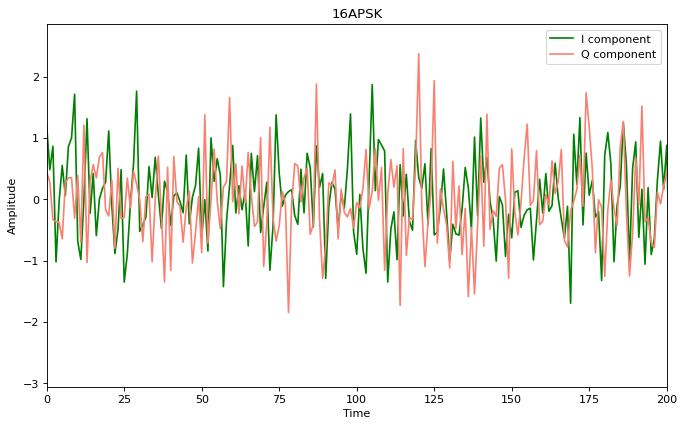

In [5]:
idx = 1
# Information about the signals[idx]
print(f'Signal index {idx}\n'
      f'\t- Classes: {classes[idx]}\n'
      f'\t- Modulation: {labels[idx]}\n'
      f'\t- SNR: {snrs[idx]}\n'
      f'\t- Samples: {signals[idx]}')

# Signal
fig = plt.figure(figsize=(10, 6), dpi=80)
plt.plot(signals[idx][:, 0], color='green', label='I component')
plt.plot(signals[idx][:, 1], color='salmon', label='Q component')
plt.title(classes[idx])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0, 200)
plt.legend()


# Display all signals

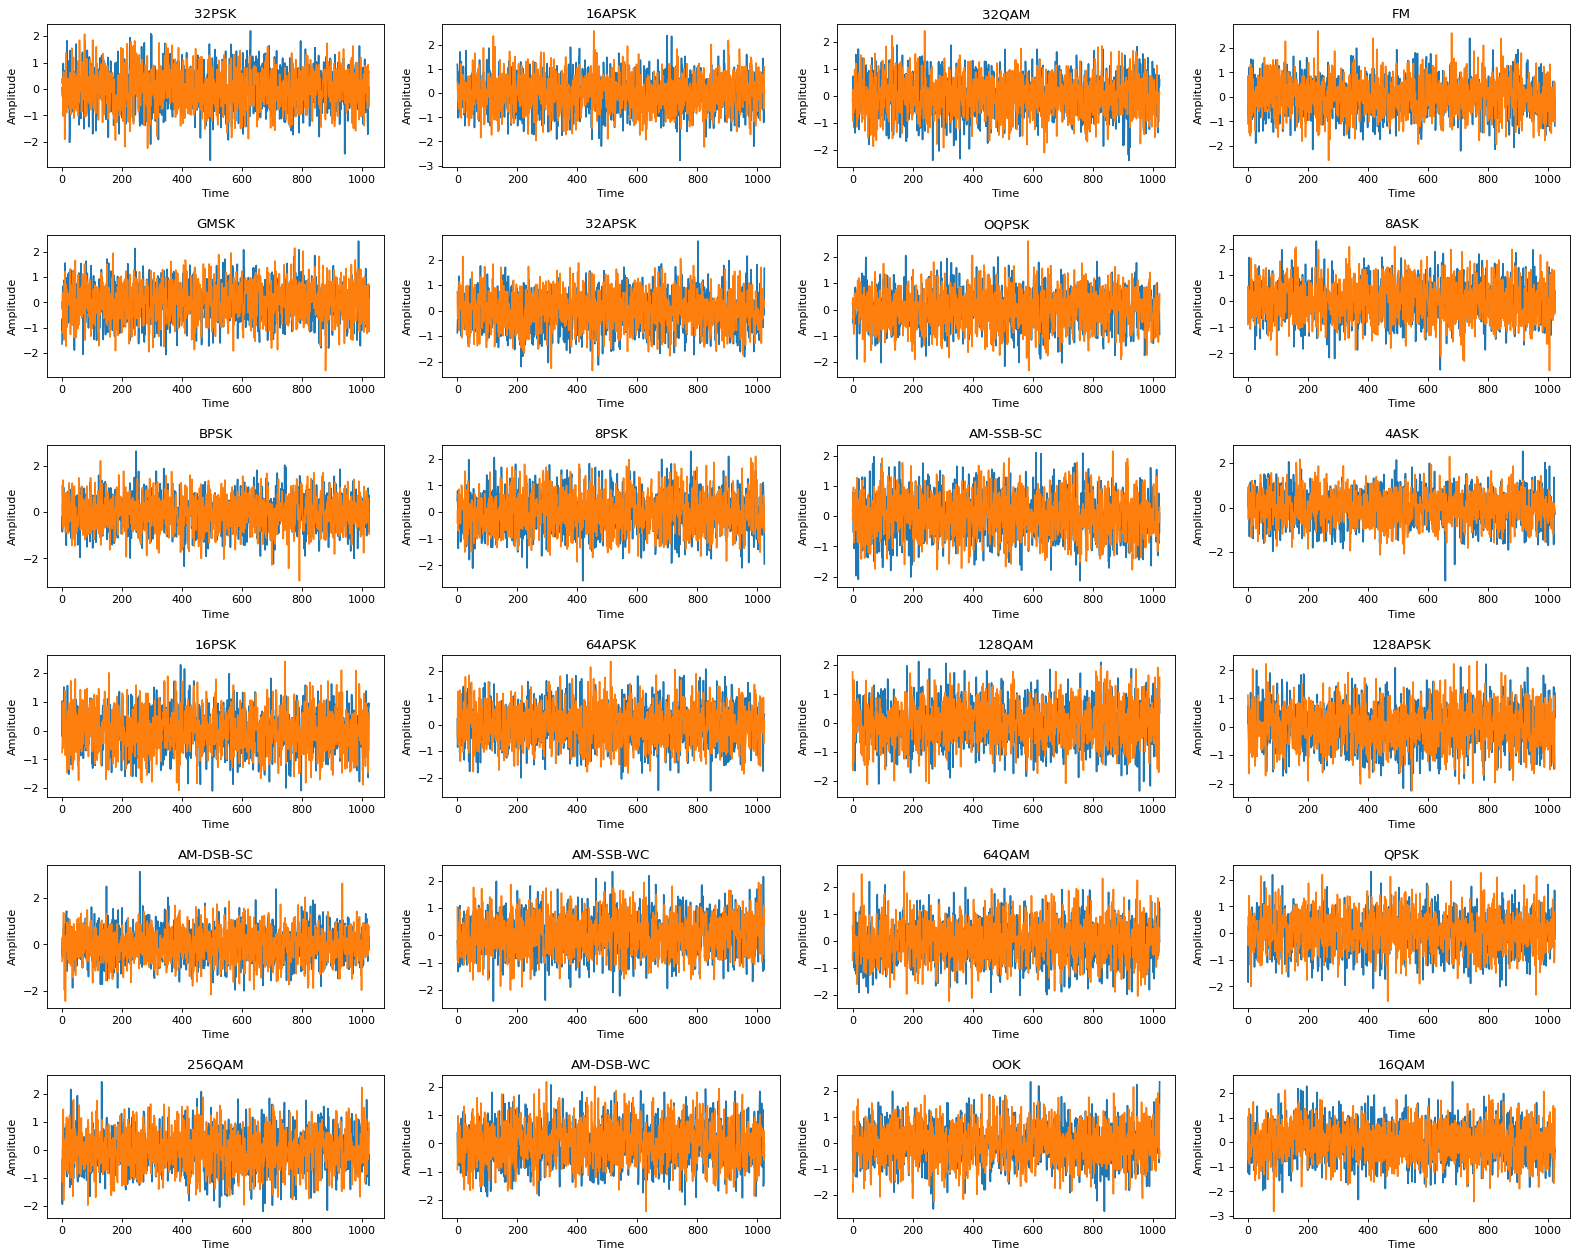

In [6]:
fig = plt.figure(figsize=(20, 16), dpi=80)
for i in range(len(signals[:24])):
    plt.subplot(6, 4, i+1)
    plt.plot(signals[i][:, 0])
    plt.plot(signals[i][:, 1])
    plt.title(classes[i])
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
plt.tight_layout(pad=1.7)